# Excercise_5 : Logistic_Regression on Amazon Fine Food Reviews Dataset
**Objective:**
1. To apply logistic_regression on amazon_fine_food_review_dataset using the text-feature_extraction techniques-BOW,Tf-IDF,Word2Vec,Tf-idf weighed Word2Vec.

**Steps:**
1. Perform DataCleaning(Deduplication), Remove wrong entries..
2. Sort the dataset according to the timestamp and take the top 100000 samples.
3. Perfrom text-preprocessing(remove html tags,remove punctutation,convert to lower-case,remove stop-words,stemming(snowball)).
4. Convert text to vectors using BOW, TFIDF, averageW2V, Tf-idf weighed W2V.
5.  Apply Logistic Regresion on the vectors.
6. Perform Hyperparameter search using RandomizedsearchCV and GridsearchCV and obtain the best parameters.
7. Obtain the performance measures of the models on train and test data.
8. Plot confusion matrix and cv scores on test data.
9. Perfrom sparsity check by training the model with increasing lambda and checking non_zero values.
10. Perform multicolinearity check using pertubation test.
11. Print a prettytable of various parameters of the models.


In [0]:
!pip install gensim
!pip install prettytable

In [0]:
#import required libraries
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from google.colab import drive
import numpy as np
import pickle
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score
import seaborn as sn
import matplotlib.pyplot as plt
import pickle
from prettytable import PrettyTable
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import the preprocessed dataset**

In [0]:
with open('/content/drive/My Drive/Colab Notebooks/x_train3.pkl','rb') as f:
  x_train = pickle.load(f)
with open('/content/drive/My Drive/Colab Notebooks/x_test3.pkl','rb') as f:
  x_test = pickle.load(f)
with open('/content/drive/My Drive/Colab Notebooks/y_train3.pkl','rb') as f:
  y_train = pickle.load(f)
with open('/content/drive/My Drive/Colab Notebooks/y_test3.pkl','rb') as f:
  y_test = pickle.load(f)

In [0]:
print(y_train.value_counts())
print(y_test.value_counts())

1    61362
0     8638
Name: Score, dtype: int64
1    26367
0     3633
Name: Score, dtype: int64


**Observations:**
1. The dataset is  imbalanced   with majority positive class.

# Logistic Regression - Bag Of Words 

In [0]:
#bow feature_extraction

bow_model = CountVectorizer(dtype='float')
bow_train = bow_model.fit_transform(x_train)
bow_test = bow_model.transform(x_test)

#Standardising the data
scaler = StandardScaler(with_mean=False)
bow_x_train = scaler.fit_transform(bow_train)
bow_x_test = scaler.transform(bow_test)

**Logistic regression -  Randomized-hyperparameter search - using L2 regularisation**

In [0]:
with open('/content/drive/My Drive/log_models/bow_r_model.pkl','rb') as f:
  r_model1 = pickle.load(f)

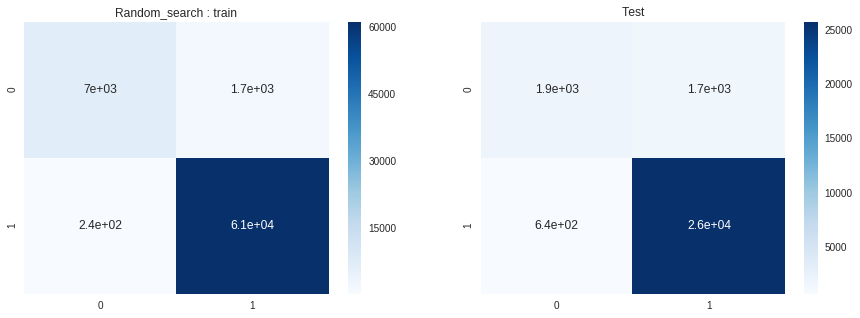

Randomized search : Best_parameters : {'C': 0.001} ,train_scores : 0.971554, test_score : 0.916147
True negative rate 0.7506785575804575
Roc-auc score on test-data 0.7542531910853585
Recall score on test-data  0.9756134562142071
Precision score on test-data 0.9381131249772072


In [0]:
# find the optimal hyperparameter 

params = {'C' : [1000,100,50,10,5,1,0.1,0.5,0.01,0.02,0.005,0.001,0.0001]}

"""r_model1 = RandomizedSearchCV(LogisticRegression(),params,scoring='f1_weighted',cv=5,n_jobs=-1)
r_model1.fit(bow_x_train,y_train)"""

train_pred = r_model1.predict(bow_x_train)
test_pred = r_model1.predict(bow_x_test)

conf1 = confusion_matrix(y_train,train_pred)
conf2 = confusion_matrix(y_test,test_pred)


plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Random_search : train')
sn.heatmap(conf1,annot=conf1,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
plt.title('Test')
sn.heatmap(conf2,annot=conf2,cbar=True,cmap='Blues')
plt.show()

print('Randomized search : Best_parameters : %s ,train_scores : %f, test_score : %f' % (r_model1.best_params_,r_model1.score(bow_x_train,y_train),r_model1.score(bow_x_test,y_test)))

print('True negative rate',conf2[0][0] / (conf2[0][0] + conf2[1][0]))

print('Roc-auc score on test-data',roc_auc_score(y_test,test_pred))
print('Recall score on test-data ',recall_score(y_test,test_pred))
print('Precision score on test-data',precision_score(y_test,test_pred))



In [0]:
cv_score = r_model1.cv_results_['mean_test_score']
train_score = r_model1.cv_results_['mean_train_score']
c_values = r_model1.cv_results_['params']


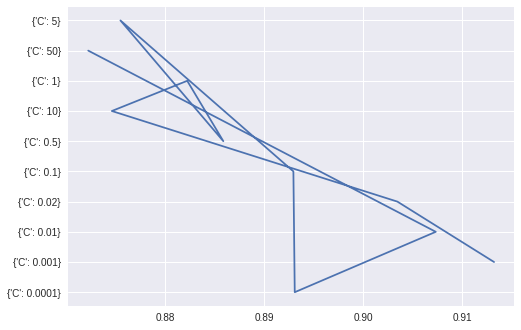

In [0]:
import matplotlib.pyplot as plt
plt.plot(cv_score,c_values)
plt.show()

**Logistic Regression using grid prarameter seach and L2 regularisation**

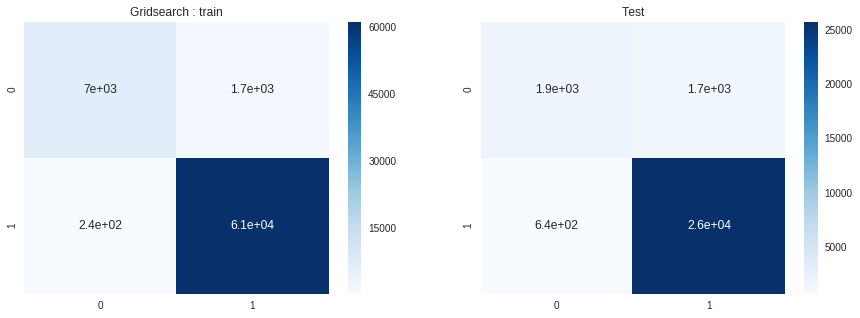

Gridsearch : Best_parameters : {'C': 0.001} ,train_score :0.971554 ,test_score : 0.916147 
True negative rate 0.7506785575804575
Roc-auc score     0.7542531910853585
Precision score on test data : 0.9381131249772072
Recall score test-data :  0.9756134562142071


In [0]:
#Gridsearch on same hyperparameter values

params2 = { 'C' : [1000,100,50,10,5,1,0.1,0.5,0.01,0.02,0.005,0.001,0.0001]} #search 10 values around the c found from random search 
g_model1 = GridSearchCV(LogisticRegression(),params2,scoring='f1_weighted',cv=5,n_jobs=-1)  
g_model1.fit(bow_x_train,y_train)

train_pred = g_model1.predict(bow_x_train)
test_pred = g_model1.predict(bow_x_test)

conf3 = confusion_matrix(y_train,train_pred)
conf4 = confusion_matrix(y_test,test_pred)

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Gridsearch : train')
sn.heatmap(conf3,annot=conf3,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
plt.title('Test')
sn.heatmap(conf4,annot=conf4,cbar=True,cmap='Blues')
plt.show()

print('Gridsearch : Best_parameters : %s ,train_score :%f ,test_score : %f ' %(g_model1.best_params_,g_model1.score(bow_x_train,y_train),g_model1.score(bow_x_test,y_test)))

print('True negative rate',conf4[0][0] / (conf4[0][0] + conf4[1][0]))
print('Roc-auc score    ',roc_auc_score(y_test,test_pred))
print('Precision score on test data :',precision_score(y_test,test_pred))
print('Recall score test-data : ',recall_score(y_test,test_pred))


In [0]:
with open('/content/drive/My Drive/log_models/bow_g_model.pkl','wb') as f:
  pickle.dump(g_model1,f)

**Observations:**

1. C hyperparameter are same for random and grid search.
2. Best Performance obtained when f1 weighted is used using both grid and random search.
3. False positive rate is high due to data imbalance.

**Logistic regression using L1 regularisation**

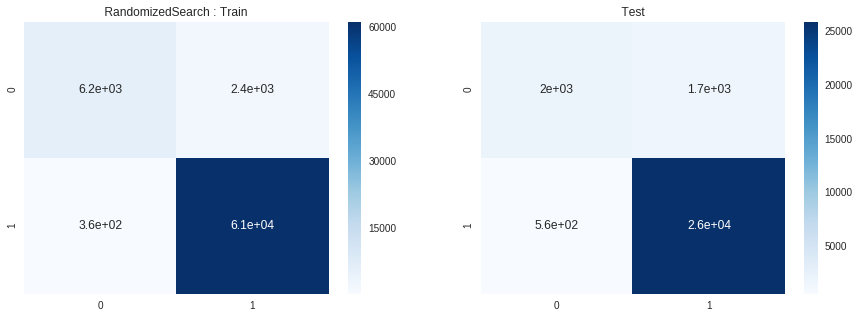

Gridsearch : Best_parameters : {'C': 0.02} ,train_score :0.977547 ,test_score : 0.958406 
True negative rate 0.7771587743732591
Roc-auc score   :  0.7581667923931013
Precision score on test data : 0.93888019791174
Recall score test-data :  0.9787613304509425


In [0]:
#apply logistic regression using l1 regularisation

params = {'C' : [100,50,10,5,1,0.1,0.5,0.01,0.02,0.005,0.001,0.0001]}

model2 = RandomizedSearchCV(LogisticRegression(penalty='l1'),params,scoring='f1',cv=5)
model2.fit(bow_x_train,y_train)

train_pred = model2.predict(bow_x_train)
test_pred = model2.predict(bow_x_test)

conf3 = confusion_matrix(y_train,train_pred)
conf4 = confusion_matrix(y_test,test_pred)

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.title(' RandomizedSearch : Train ')
sn.heatmap(conf3,annot=conf3,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
plt.title(' Test ')
sn.heatmap(conf4,annot=conf4,cbar=True,cmap='Blues')
plt.show()

print('Gridsearch : Best_parameters : %s ,train_score :%f ,test_score : %f ' %(model2.best_params_,model2.score(bow_x_train,y_train),model2.score(bow_x_test,y_test)))

print('True negative rate',conf4[0][0] / (conf4[0][0] + conf4[1][0]))
print('Roc-auc score   : ',roc_auc_score(y_test,test_pred))
print('Precision score on test data :',precision_score(y_test,test_pred))
print('Recall score test-data : ',recall_score(y_test,test_pred))

In [0]:
with open('/content/drive/My Drive/log_models/bow_l1.pkl','wb') as f:
  pickle.dump(model2,f)

**Sparsity**

In [0]:
#obtain weights from the model
w = model2.best_estimator_.coef_
print('The number of non zero weights ',np.count_nonzero(w[0]))

The number of non zero weights  5508


**Observations:**
1. Perform random hyperparameter search, by applying 'L1' Regularisation.
2. Best performance with f1  metric.
3. Weight sparsity due to l1 regularisation.

**Sparsity and L1 Regularisation:**

In [0]:
#find relationship bw l1 and sparsity
c_range = [1000,100,50,10,5,1,0.1,0.5,0.01,0.02,0.005,0.001,0.0001]
for i in c_range :
  
  clf = LogisticRegression(C = i,penalty='l1')
  clf.fit(bow_x_train,y_train)
  
  w = clf.coef_
  print('C : %f ; non_zeros : %d ' %(i,np.count_nonzero(w[0])))

C : 1000.000000 ; non_zeros : 18441 
C : 100.000000 ; non_zeros : 17181 
C : 50.000000 ; non_zeros : 15663 
C : 10.000000 ; non_zeros : 13783 
C : 5.000000 ; non_zeros : 13421 
C : 1.000000 ; non_zeros : 12637 
C : 0.100000 ; non_zeros : 9898 
C : 0.500000 ; non_zeros : 12158 
C : 0.010000 ; non_zeros : 3321 
C : 0.020000 ; non_zeros : 5517 
C : 0.005000 ; non_zeros : 1364 
C : 0.001000 ; non_zeros : 59 
C : 0.000100 ; non_zeros : 0 


**Observations:**
1.  Using the  L1 regularisation, non_zeros weights decreases as lambda increases.

**Multicollinearity - Pertubation test:**

In [0]:
#train a model using best parameters obtained
clf = LogisticRegression(C=0.001,penalty='l2')
clf.fit(bow_x_train,y_train)
w = clf.coef_
# add noise to bow_data.
bow_x_train.data+=np.random.normal(loc=0.0,scale=0.001) #add a random value to the data
clf.fit(bow_x_train,y_train)
w_m = clf.coef_


coll = ((abs(w - w_m) ) / (w)) * 100
print('Percent of features that change more than 200%',len(coll[coll > 200]) / bow_x_train.shape[1])
print('Percent of features that change more than 100%',len(coll[coll > 100]) / bow_x_train.shape[1])
print('Percent of features that change more than 50%',len(coll[coll > 50]) / bow_x_train.shape[1])
print('Percent of features that change more than 25%',len(coll[coll > 25]) / bow_x_train.shape[1])
print('Percent of features that change more than 10%',len(coll[coll > 10]) / bow_x_train.shape[1])
print('Percent of features that change more than 5%',len(coll[coll > 5]) / bow_x_train.shape[1])
print('Percent of features that change more than 3%',len(coll[coll > 3]) / bow_x_train.shape[1])
print('Percent of features that change more than 1%',len(coll[coll > 1]) / bow_x_train.shape[1])


model.best_estimator_.coef_[coll>5] = 0

print('Score of the model',model.score(bow_x_test,y_test))


In [0]:
clf = LogisticRegression(C=0.001,penalty='l2')
clf.fit(bow_x_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
with open('/content/drive/My Drive/log_models/clf2.pkl','wb') as f:
  pickle.dump(clf,f)

**Observations:**
1. Percent of features whose collinearity_percent is more than 5%  is 7.07%.
2. removing the weights of those features by equating it to zero.
3. The score of the model after removal of the features is0.9557908892250799.
4. The model score doesnt improve with removal of more features.

**Important features:**


In [0]:
w = g_model1.best_estimator_.coef_
w_sorted_negative = np.argsort(w)[0] #taking the abslute values of weights
w_sorted_positive = np.argsort(w)[0][::-1]
print('The important positive features of the model are \n',np.take(bow_model.get_feature_names(),w_sorted_positive[0:10]))
print('The important negative features of the model are \n',np.take(bow_model.get_feature_names(),w_sorted_negative[0:10]))

The important positive features of the model are 
 ['great' 'love' 'best' 'good' 'delici' 'excel' 'perfect' 'favorit' 'nice'
 'wonder']
The important negative features of the model are 
 ['disappoint' 'worst' 'terribl' 'horribl' 'unfortun' 'aw' 'stale' 'return'
 'bland' 'would']


# Tf-Idf

In [0]:
#tfidf model

tfidf_model = TfidfVectorizer(ngram_range=(1,2))
tfidf_x_train_matrix = tfidf_model.fit_transform(x_train)
tfidf_x_test_matrix = tfidf_model.transform(x_test)

#standardising the data
scaler = StandardScaler(with_mean=False)
tfidf_x_train = scaler.fit_transform(tfidf_x_train_matrix)
tfidf_x_test = scaler.transform(tfidf_x_test_matrix)

**Logistic Regression - Random hyperparameter search using L2 Regularisation**

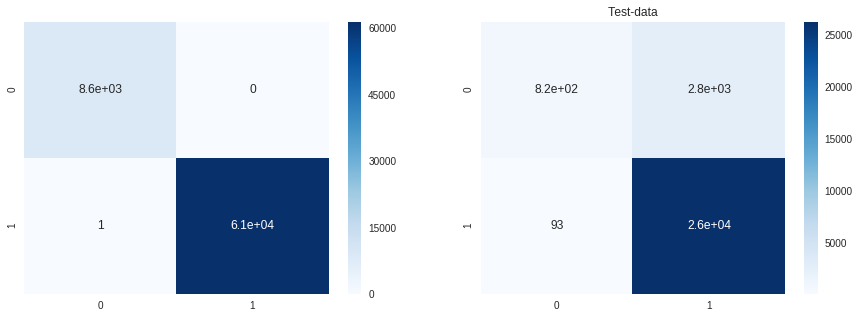

Randomized search - C: 500.000000, train_score : 0.999986 , test_score : 0.903033
True negative rate 0.8978021978021978
Roc-auc score     0.6106779402987814
Precision score on test data : 0.9031969749054658
Recall score test-data :  0.9964728638070315


In [0]:
#RandomizedsearchCV

params = {'C' : [1000,500,100,50,25,10,5,1,0.1,0.5,0.01,0.05,0.001,0.0001]}
r_model2 = RandomizedSearchCV(LogisticRegression(),params,scoring='f1_micro',cv=5,n_jobs=-1)
r_model2.fit(tfidf_x_train,y_train)

c_random = r_model2.best_estimator_.C

#plot confusion matrix
train_pred = r_model2.predict(tfidf_x_train)
test_pred = r_model2.predict(tfidf_x_test)

conf1 = confusion_matrix(y_train,train_pred)
conf2 = confusion_matrix(y_test,test_pred)

plt.figure(1,figsize=(15,5))
plt.title('Train-data')
plt.subplot(1,2,1)
sn.heatmap(conf1,annot=conf1,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
plt.title('Test-data')
sn.heatmap(conf2,annot=conf2,cbar=True,cmap='Blues')
plt.show()

print('Randomized search - C: %f, train_score : %f , test_score : %f' %(r_model2.best_estimator_.C,r_model2.score(tfidf_x_train,y_train),r_model2.score(tfidf_x_test,y_test)))


print('True negative rate',conf2[0][0] / (conf2[0][0] + conf2[1][0]))
print('Roc-auc score    ',roc_auc_score(y_test,test_pred))
print('Precision score on test data :',precision_score(y_test,test_pred))
print('Recall score test-data : ',recall_score(y_test,test_pred))


In [0]:
with open('/content/drive/My Drive/log_models/tfidf_r.pkl','wb') as f:
  pickle.dump(r_model2,f)

**Logistic Regression - Grid hyperparameter search  using L2 Regularisation**

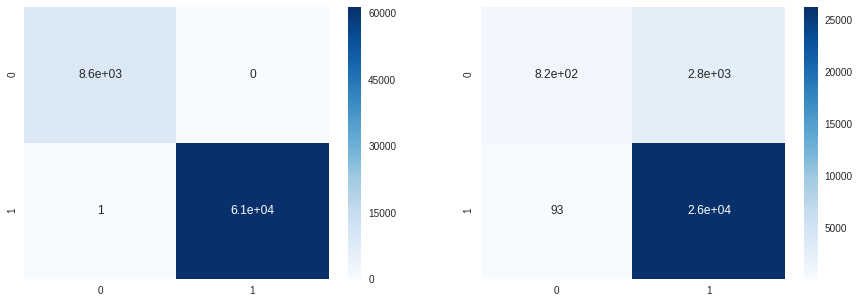

Gridsearch - C : 500.000000, train_score - 0.999986,test_score : 0.903033
True negative rate 0.8978021978021978
Roc-auc score     0.6106779402987814
Precision score on test data : 0.9031969749054658
Recall score test-data :  0.9964728638070315


In [0]:
#GridsearchCV
c_range = [1000,500,100,50,25,10,5,1,0.1,0.5,0.01,0.05,0.001,0.0001] 
params = {'C': c_range}
g_model2 = GridSearchCV(LogisticRegression(),params,scoring='f1_micro',cv=5)
g_model2.fit(tfidf_x_train,y_train)

#plot confusion matrix
train_pred = g_model2.predict(tfidf_x_train)
test_pred = g_model2.predict(tfidf_x_test)

conf3 = confusion_matrix(y_train,train_pred)
conf4 = confusion_matrix(y_test,test_pred)

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
sn.heatmap(conf3,annot=conf3,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
sn.heatmap(conf4,annot=conf4,cbar=True,cmap='Blues')
plt.show()

print('Gridsearch - C : %f, train_score - %f,test_score : %f' %(g_model2.best_estimator_.C,g_model2.score(tfidf_x_train,y_train),g_model2.score(tfidf_x_test,y_test)) )

print('True negative rate',conf4[0][0] / (conf4[0][0] + conf4[1][0]))
print('Roc-auc score    ',roc_auc_score(y_test,test_pred))
print('Precision score on test data :',precision_score(y_test,test_pred))
print('Recall score test-data : ',recall_score(y_test,test_pred))


In [0]:
with open('/content/drive/My Drive/log_models/tfidf_g.pkl','wb') as f:
  pickle.dump(g_model2,f)

**Hyperparameter search using L1 Regularisation**

true negative rate 0.8170459616242749


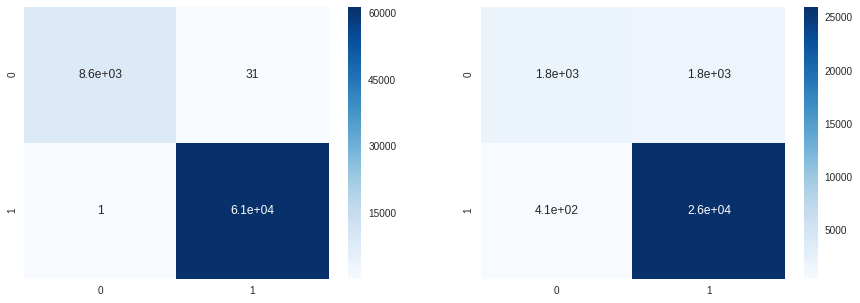

Gridsearch - C : 500.000000, train_score - 0.999986,test_score : 0.903033
True negative rate 0.8170459616242749
Roc-auc score     0.7442207258234517
Precision score on test data : 0.9350841168629994
Recall score test-data :  0.98445025979444


In [0]:
#GridsearchCV
c_range = [1000,500,100,50,25,10,5,1,0.1,0.5,0.01,0.05,0.001,0.0001] 
params = {'C': c_range}
model3 = RandomizedSearchCV(LogisticRegression(penalty='l1'),params,scoring='f1_micro',cv=5)
model3.fit(tfidf_x_train,y_train)

#plot confusion matrix
train_pred = model3.predict(tfidf_x_train)
test_pred = model3.predict(tfidf_x_test)

conf3 = confusion_matrix(y_train,train_pred)
conf4 = confusion_matrix(y_test,test_pred)

print('true negative rate',conf4[0][0] / (conf4[0][0] + conf4[1][0]))

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
sn.heatmap(conf3,annot=conf3,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
sn.heatmap(conf4,annot=conf4,cbar=True,cmap='Blues')
plt.show()

print('Gridsearch - C : %f, train_score - %f,test_score : %f' %(g_model2.best_estimator_.C,g_model2.score(tfidf_x_train,y_train),g_model2.score(tfidf_x_test,y_test)) )

print('True negative rate',conf4[0][0] / (conf4[0][0] + conf4[1][0]))
print('Roc-auc score    ',roc_auc_score(y_test,test_pred))
print('Precision score on test data :',precision_score(y_test,test_pred))
print('Recall score test-data : ',recall_score(y_test,test_pred))

In [0]:
with open('/content/drive/My Drive/log_models/tfidf_l1.pkl','wb') as f:
  pickle.dump(model3,f)

**Obserations:**
1 . False positive  and false negative rate is low on train and test data.

**Important Features:**


In [0]:
w = g_model2.best_estimator_.coef_
w_sorted_negative = np.argsort(w)[0]
w_sorted_positive = np.argsort(w)[0][::-1] #taking the abslute values of weights
print('The important positive features of the model are \n',np.take(tfidf_model.get_feature_names(),w_sorted_positive[0:10]))
print('The important negative features of the model are \n',np.take(tfidf_model.get_feature_names(),w_sorted_negative[0:10]))

The important positive features of the model are 
 ['great' 'love' 'good' 'best' 'excel' 'delici' 'favorit' 'use' 'find'
 'price']
The important negative features of the model are 
 ['worth' 'worst' 'disappoint' 'condit good' 'terribl' 'wast money' 'stale'
 'horribl' 'wont buy' 'aw']


# AverageWord2Vector

In [0]:
list_of_sent_train = []
for i in x_train.values:
  list_of_sent_train.append(i.split())
list_of_sent_test = []
for i in x_test.values:
  list_of_sent_test.append(i.split())
  
w2v_model = Word2Vec(list_of_sent_train,min_count=5,size=50)
w2v_words = list(w2v_model.wv.vocab)

# compute average word2vec for each review.
sent_vectors_x_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_train): # for each review/sentence
    sent_vec_x_train = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec_x_train += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec_x_train /= cnt_words
    sent_vectors_x_train.append(sent_vec_x_train)
    
# compute average word2vec for each review.
sent_vectors_x_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_test): # for each review/sentence
    sent_vec_x_test = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec_x_test += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec_x_test /= cnt_words
    sent_vectors_x_test.append(sent_vec_x_test)

#standardising the data

scaler = StandardScaler()
w2v_x_train = scaler.fit_transform(sent_vectors_x_train)
w2v_x_test = scaler.transform(sent_vectors_x_test)

100%|██████████| 30000/30000 [00:37<00:00, 807.01it/s]


**Logistic Regression - Random hyperparameter search using L2 Regularisation**

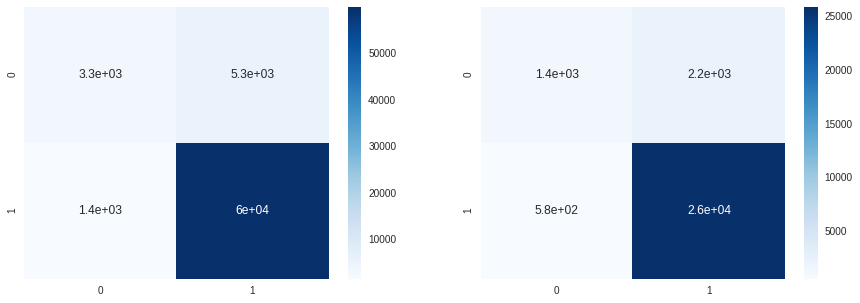

RandomizedsearchCV - Best_parameters : {'C': 0.1},train-score - 0.946666,test_score : 0.948470 
True negative rate 0.7086891009542943
Roc-auc score on test-data :  0.6831935309873773
Recall score on test-data : 0.9780028065384762
Precision score on test-data : 0.9206683565996644


In [0]:
# Hyperparameter search - Random search
params = {'C': [1000,100,50,10,5,1,0.1,0.5,0.01,0.05,0.001,0.0001]} 
r_model3 = RandomizedSearchCV(LogisticRegression(),params,scoring='f1',cv=5)
r_model3.fit(w2v_x_train,y_train)
c = r_model3.best_estimator_.C

#confusion matrix
train_pred = r_model3.predict(w2v_x_train)
test_pred = r_model3.predict(w2v_x_test)
conf1 = confusion_matrix(y_train,train_pred)
conf2 = confusion_matrix(y_test,test_pred)

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
sn.heatmap(conf1,annot=conf1,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
sn.heatmap(conf2,annot=conf2,cbar=True,cmap='Blues')
plt.show()

print('RandomizedsearchCV - Best_parameters : %s,train-score - %f,test_score : %f ' %(r_model3.best_params_,r_model3.score(w2v_x_train,y_train),r_model3.score(w2v_x_test,y_test)))

print('True negative rate',conf2[0][0] / (conf2[0][0] + conf2[1][0]))
print('Roc-auc score on test-data : ',roc_auc_score(y_test,test_pred))
print('Recall score on test-data :',recall_score(y_test,test_pred))
print('Precision score on test-data :',precision_score(y_test,test_pred))


In [0]:
with open('/content/drive/My Drive/log_models/w2v_r.pkl','wb') as f:
  pickle.dump(r_model3,f)

**Logistic Regression - Grid hyperparameter search using L2 Regularisation**

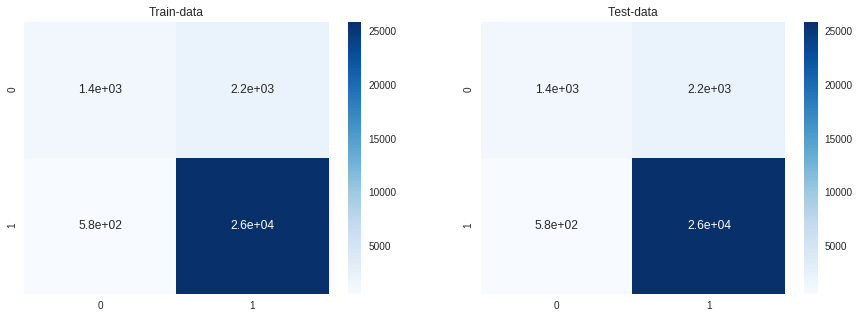

GridsearchCV - Best_params: {'C': 0.1} , train_score - 0.946666, test_score : 0.948470
True negative rate 0.7086891009542943
Roc-auc score on test-data :  0.6831935309873773
Recall score on test-data : 0.9780028065384762
Precision score on test-data : 0.9206683565996644


In [0]:

#Grid search
params2 = {'C' :[1000,100,50,10,5,1,0.1,0.5,0.01,0.05,0.001,0.0001]}
g_model3 = GridSearchCV(LogisticRegression(),params2,scoring='f1',cv=5)
g_model3.fit(w2v_x_train,y_train)

#confusion matrix
train_pred = g_model3.predict(w2v_x_train)
test_pred = g_model3.predict(w2v_x_test)
conf3 = confusion_matrix(y_train,train_pred)
conf4 = confusion_matrix(y_test,test_pred)

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Train-data')
sn.heatmap(conf4,annot=conf4,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
plt.title('Test-data')
sn.heatmap(conf4,annot=conf4,cbar=True,cmap='Blues')
plt.show()

print('GridsearchCV - Best_params: %s , train_score - %f, test_score : %f' %(g_model3.best_params_,g_model3.score(w2v_x_train,y_train),g_model3.score(w2v_x_test,y_test)))

print('True negative rate',conf4[0][0] / (conf4[0][0] + conf4[1][0]))
print('Roc-auc score on test-data : ',roc_auc_score(y_test,test_pred))
print('Recall score on test-data :',recall_score(y_test,test_pred))
print('Precision score on test-data :',precision_score(y_test,test_pred))

In [0]:
with open('/content/drive/My Drive/log_models/w2v_g.pkl','wb') as f:
  pickle.dump(g_model3,f)

**Hyperparameter search using L1 Regularisation**

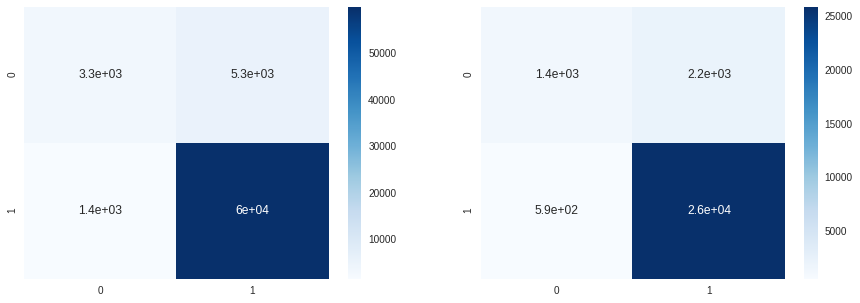

RandomizedsearchCV - Best_parameters : {'C': 0.1},train-score - 0.946666,test_score : 0.948470 
True negative rate 0.7077306733167082
Roc-auc score on test-data :  0.6841807708425662
Recall score on test-data : 0.9777752493647363
Precision score on test-data : 0.9209144490087515


In [0]:
# Hyperparameter search - Random search
params = {'C': [1000,100,50,10,5,1,0.1,0.5,0.01,0.05,0.001,0.0001]} 
model4 = RandomizedSearchCV(LogisticRegression(penalty='l1'),params,scoring='f1',cv=5)
model4.fit(w2v_x_train,y_train)
c = r_model3.best_estimator_.C

#confusion matrix
train_pred = model4.predict(w2v_x_train)
test_pred = model4.predict(w2v_x_test)
conf1 = confusion_matrix(y_train,train_pred)
conf2 = confusion_matrix(y_test,test_pred)

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
sn.heatmap(conf1,annot=conf1,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
sn.heatmap(conf2,annot=conf2,cbar=True,cmap='Blues')
plt.show()

print('RandomizedsearchCV - Best_parameters : %s,train-score - %f,test_score : %f ' %(r_model3.best_params_,r_model3.score(w2v_x_train,y_train),r_model3.score(w2v_x_test,y_test)))

print('True negative rate',conf2[0][0] / (conf2[0][0] + conf2[1][0]))
print('Roc-auc score on test-data : ',roc_auc_score(y_test,test_pred))
print('Recall score on test-data :',recall_score(y_test,test_pred))
print('Precision score on test-data :',precision_score(y_test,test_pred))

In [0]:
with open('/content/drive/My Drive/log_models/w2v_l1.pkl','wb') as f:
  pickle.dump(model4,f)

**Sparsity**

In [0]:
w = r_model3.best_estimator_.coef_
print('The number of non zero weights',np.count_nonzero(w[0]))

The number of non zero weights 50


In [0]:
w

array([[-0.33783895,  0.01499791, -0.03490161,  0.6869163 , -0.07098764,
        -0.00459371, -0.31087602,  0.23215088,  0.4096571 ,  0.1239868 ,
        -0.4802402 ,  0.10997965, -0.14526203,  0.24242431,  0.00566753,
        -0.10670321,  0.02305682, -0.40519086,  0.25506858,  0.41294166,
         0.38567995,  0.26353717,  0.1129458 ,  0.50053474,  0.12926609,
         0.21051687, -0.29408942,  0.22303154,  0.54434133, -0.10042693,
         0.09355113,  0.70376397, -0.0338835 ,  0.53377288, -0.01423394,
        -0.13356722, -0.08411812, -0.23483684, -0.0050231 ,  0.05374268,
         0.21780756, -0.12254833, -0.09062104, -0.21990494,  0.10944912,
         0.05959897,  0.01203609, -0.16389407, -0.34270922,  0.23254908]])

**Obserations:**
1. l2 regularisation gives better performance than l1 regularisation.
2. False positive rate is 30%.

# Tf-Idf weighted Word2Vec

In [0]:
#tfidf model.
tfidf_model2 = TfidfVectorizer()
tfidf_x_train = tfidf_model2.fit_transform(x_train)
idf_dict = dict(zip(tfidf_model2.get_feature_names(),list(tfidf_model2.idf_)))

# tfidfw2v vectors

tfidf_x_train_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_train): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]

            tf_idf = idf_dict[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_x_train_vectors.append(sent_vec)

tfidf_x_test_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_test): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]

            tf_idf = idf_dict[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_x_test_vectors.append(sent_vec)

#standardising the data

scaler = StandardScaler()
tfidfw2v_train = scaler.fit_transform(tfidf_x_train_vectors)
tfidfw2v_test = scaler.transform(tfidf_x_test_vectors)

100%|██████████| 30000/30000 [01:03<00:00, 473.67it/s]


**Logistic Regression - Random hyperparameter search using L2 Regularisation**

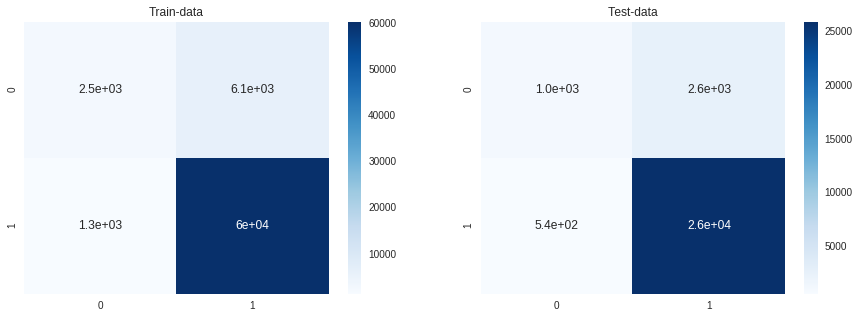

RandomsearchCV - C : 0.100000 ,train-score : 0.977876, test-score : 0.977463
True negative rate 0.660377358490566
Roc-auc score on test-data :  0.6342685977019356
Recall score on test-data : 0.9795198543634088
Precision score on test-data : 0.9090813093980993


In [0]:
#Hyperparameter search - random

params = {'C': [1000,500,100,50,25,10,5,1,0.1,0.5,0.01,0.05,0.001,0.0001]}
r_model4 = RandomizedSearchCV(LogisticRegression(),params,scoring='average_precision',cv=5)
r_model4.fit(tfidfw2v_train,y_train)
c = r_model4.best_estimator_.C

train_pred = r_model4.predict(tfidfw2v_train)
test_pred = r_model4.predict(tfidfw2v_test)
conf2 = confusion_matrix(y_test,test_pred)
conf1 = confusion_matrix(y_train,train_pred)

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Train-data')
sn.heatmap(conf1,annot=conf1,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
plt.title('Test-data')
sn.heatmap(conf2,annot=conf2,cbar=True,cmap='Blues')
plt.show()

print('RandomsearchCV - C : %f ,train-score : %f, test-score : %f' %(c,r_model4.score(tfidfw2v_train,y_train),r_model4.score(tfidfw2v_test,y_test)))

print('True negative rate',conf2[0][0] / (conf2[0][0] + conf2[1][0]))
print('Roc-auc score on test-data : ',roc_auc_score(y_test,test_pred))
print('Recall score on test-data :',recall_score(y_test,test_pred))
print('Precision score on test-data :',precision_score(y_test,test_pred))

In [0]:
with open('/content/drive/My Drive/log_models/tfidfw2v_r.pkl','wb') as f:
  pickle.dump(r_model4,f)

**Logistic Regression - Grid hyperparameter search using L2 Regularisation**

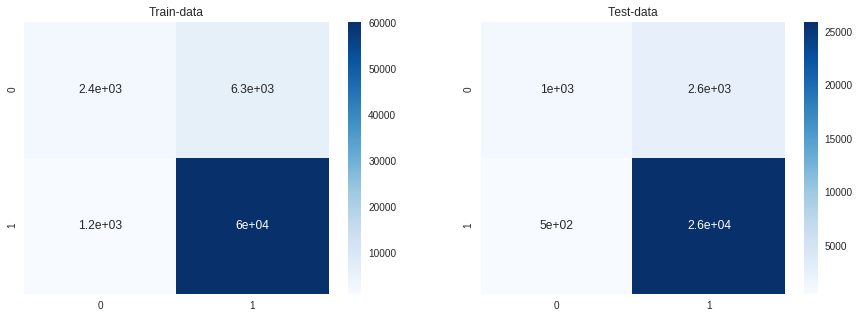

GridsearchCV - C : 0.010000 ,train-score : 0.977895, test-score : 0.977447 
True negative rate 0.6684420772303595
Roc-auc score on test-data :  0.6287341917681866
Recall score on test-data : 0.9811127545795881
Precision score on test-data : 0.9077479121341848


In [0]:

#GRidsearch
params = {'C' : [1000,500,100,50,25,10,5,1,0.1,0.5,0.01,0.05,0.001,0.0001]}
g_model4 = GridSearchCV(LogisticRegression(),params,scoring='average_precision',cv=5)
g_model4.fit(tfidfw2v_train,y_train)


train_pred = g_model4.predict(tfidfw2v_train)
test_pred = g_model4.predict(tfidfw2v_test)
conf4 = confusion_matrix(y_test,test_pred)
conf3 = confusion_matrix(y_train,train_pred)


plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Train-data')
sn.heatmap(conf3,annot=conf3,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
plt.title('Test-data')
sn.heatmap(conf4,annot=conf4,cbar=True,cmap='Blues')
plt.show()

print('GridsearchCV - C : %f ,train-score : %f, test-score : %f ' %(g_model4.best_estimator_.C,g_model4.score(tfidfw2v_train,y_train),g_model4.score(tfidfw2v_test,y_test)))

print('True negative rate',conf4[0][0] / (conf4[0][0] + conf4[1][0]))
print('Roc-auc score on test-data : ',roc_auc_score(y_test,test_pred))
print('Recall score on test-data :',recall_score(y_test,test_pred))
print('Precision score on test-data :',precision_score(y_test,test_pred))


In [0]:
with open('/content/drive/My Drive/log_models/tfidfw2_g.pkl','wb') as f:
  pickle.dump(g_model4,f)

**Observations:**
1. f1-metric gives best model performance.
2. False positive rate is 34% due to class imbalance.

**Hyperparameter search using L1 Regularisation**

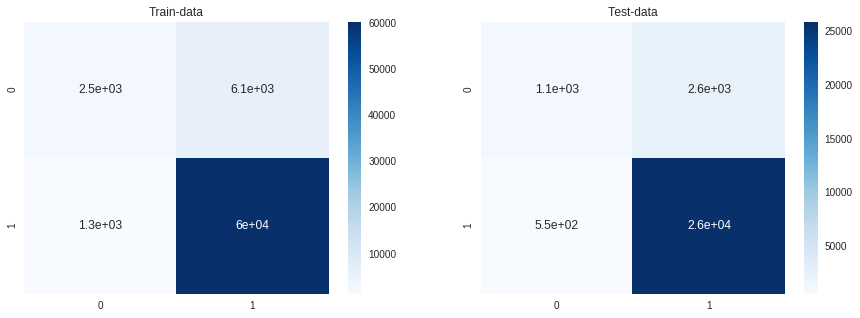

RandomsearchCV - C : 50.000000 ,train-score : 0.977876, test-score : 0.977463
True negative rate 0.6579764121663563
Roc-auc score on test-data :  0.635436276678581
Recall score on test-data : 0.9791026662115523
Precision score on test-data : 0.9093663038500828


In [0]:
#Hyperparameter search - random

params = {'C': [1000,500,100,50,25,10,5,1,0.1,0.5,0.01,0.05,0.001,0.0001]}
model5 = RandomizedSearchCV(LogisticRegression(penalty='l1'),params,scoring='f1',cv=5)
model5.fit(tfidfw2v_train,y_train)
c = model5.best_estimator_.C

train_pred = model5.predict(tfidfw2v_train)
test_pred = model5.predict(tfidfw2v_test)
conf2 = confusion_matrix(y_test,test_pred)
conf1 = confusion_matrix(y_train,train_pred)

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Train-data')
sn.heatmap(conf1,annot=conf1,cbar=True,cmap='Blues')
plt.subplot(1,2,2)
plt.title('Test-data')
sn.heatmap(conf2,annot=conf2,cbar=True,cmap='Blues')
plt.show()

print('RandomsearchCV - C : %f ,train-score : %f, test-score : %f' %(c,r_model4.score(tfidfw2v_train,y_train),r_model4.score(tfidfw2v_test,y_test)))

print('True negative rate',conf2[0][0] / (conf2[0][0] + conf2[1][0]))
print('Roc-auc score on test-data : ',roc_auc_score(y_test,test_pred))
print('Recall score on test-data :',recall_score(y_test,test_pred))
print('Precision score on test-data :',precision_score(y_test,test_pred))

In [0]:
with open('/content/drive/My Drive/log_models/tfidfw2v_l1.pkl','wb') as f:
  pickle.dump(model5,f)

**Sparsity**

In [0]:
w = r_model4.best_estimator_.coef_
print('The number of non-zero weights ',np.count_nonzero(w[0]))

The number of non-zero weights  50


# Conclusion:


In [0]:
x = PrettyTable()
x.field_names = ["Vectorizer","Hyperparameter","Train-Score","Test-Score"]
x.add_row(['BOW','0.00265995','0.987468','0.955810 '])
x.add_row(['Tf-IDF','0.908561','0.999992','0.944366'])
x.add_row(['avgW2V','0.599747','0.903329','0.906167'])
x.add_row(['Tf-Idf weighed W2v','0.828218','0.941996','0.943134'])
print(x)

+--------------------+----------------+-------------+------------+
|     Vectorizer     | Hyperparameter | Train-Score | Test-Score |
+--------------------+----------------+-------------+------------+
|        BOW         |   0.00265995   |   0.987468  | 0.955810   |
|       Tf-IDF       |    0.908561    |   0.999992  |  0.944366  |
|       avgW2V       |    0.599747    |   0.903329  |  0.906167  |
| Tf-Idf weighed W2v |    0.828218    |   0.941996  |  0.943134  |
+--------------------+----------------+-------------+------------+
